In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [2]:
# Load the data
df = pd.read_csv("ATM_cash_flow_data.csv")  


df.head()

,ATM Name,Transaction Date,No Of Withdrawals,No Of XYZ Card Withdrawals,No Of Other Card Withdrawals,Total amount Withdrawn,Amount withdrawn XYZ Card,Amount withdrawn Other Card,Weekday,Festival Religion,Working Day,Holiday Sequence
0,Big Street ATM,1/1/2011,50,20,30,123800,41700,82100,Saturday,H,H,HHW
1,Mount Road ATM,1/1/2011,253,67,186,767900,270900,497000,Saturday,C,H,HHW
2,Airport ATM,1/1/2011,98,56,42,503400,347700,155700,Saturday,C,H,HHW
3,KK Nagar ATM,1/1/2011,265,159,106,945300,532600,412700,Saturday,C,H,HHW
4,Christ College ATM,1/1/2011,74,25,49,287700,148200,139500,Saturday,C,H,HHW


In [3]:
df.isnull().sum()

ATM Name                        0
Transaction Date                0
No Of Withdrawals               0
No Of XYZ Card Withdrawals      0
No Of Other Card Withdrawals    0
Total amount Withdrawn          0
Amount withdrawn XYZ Card       0
Amount withdrawn Other Card     0
Weekday                         0
Festival Religion               0
Working Day                     0
Holiday Sequence                0
dtype: int64

In [4]:
# Convert 'Transaction Date' to datetime format
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'])
df.head()

,ATM Name,Transaction Date,No Of Withdrawals,No Of XYZ Card Withdrawals,No Of Other Card Withdrawals,Total amount Withdrawn,Amount withdrawn XYZ Card,Amount withdrawn Other Card,Weekday,Festival Religion,Working Day,Holiday Sequence
0,Big Street ATM,2011-01-01,50,20,30,123800,41700,82100,Saturday,H,H,HHW
1,Mount Road ATM,2011-01-01,253,67,186,767900,270900,497000,Saturday,C,H,HHW
2,Airport ATM,2011-01-01,98,56,42,503400,347700,155700,Saturday,C,H,HHW
3,KK Nagar ATM,2011-01-01,265,159,106,945300,532600,412700,Saturday,C,H,HHW
4,Christ College ATM,2011-01-01,74,25,49,287700,148200,139500,Saturday,C,H,HHW


In [5]:
# Convert the 'Transaction Date' column to datetime format
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'], format="%d-%m-%Y")

# Create new columns for Year, Month, Day, and Weekday
df['Year'] = df['Transaction Date'].dt.year
df['Month'] = df['Transaction Date'].dt.month
df['Day'] = df['Transaction Date'].dt.day
df['Weekday'] = df['Transaction Date'].dt.dayofweek

In [6]:
df.head()

,ATM Name,Transaction Date,No Of Withdrawals,No Of XYZ Card Withdrawals,No Of Other Card Withdrawals,Total amount Withdrawn,Amount withdrawn XYZ Card,Amount withdrawn Other Card,Weekday,Festival Religion,Working Day,Holiday Sequence,Year,Month,Day
0,Big Street ATM,2011-01-01,50,20,30,123800,41700,82100,5,H,H,HHW,2011,1,1
1,Mount Road ATM,2011-01-01,253,67,186,767900,270900,497000,5,C,H,HHW,2011,1,1
2,Airport ATM,2011-01-01,98,56,42,503400,347700,155700,5,C,H,HHW,2011,1,1
3,KK Nagar ATM,2011-01-01,265,159,106,945300,532600,412700,5,C,H,HHW,2011,1,1
4,Christ College ATM,2011-01-01,74,25,49,287700,148200,139500,5,C,H,HHW,2011,1,1


In [7]:
# Create new columns for sin and cos waves for the month
df['Sin_Month'] = np.sin(2 * np.pi * df['Month'] / 12)
df['Cos_Month'] = np.cos(2 * np.pi * df['Month'] / 12)

df.head()

,ATM Name,Transaction Date,No Of Withdrawals,No Of XYZ Card Withdrawals,No Of Other Card Withdrawals,Total amount Withdrawn,Amount withdrawn XYZ Card,Amount withdrawn Other Card,Weekday,Festival Religion,Working Day,Holiday Sequence,Year,Month,Day,Sin_Month,Cos_Month
0,Big Street ATM,2011-01-01,50,20,30,123800,41700,82100,5,H,H,HHW,2011,1,1,0.5,0.866025
1,Mount Road ATM,2011-01-01,253,67,186,767900,270900,497000,5,C,H,HHW,2011,1,1,0.5,0.866025
2,Airport ATM,2011-01-01,98,56,42,503400,347700,155700,5,C,H,HHW,2011,1,1,0.5,0.866025
3,KK Nagar ATM,2011-01-01,265,159,106,945300,532600,412700,5,C,H,HHW,2011,1,1,0.5,0.866025
4,Christ College ATM,2011-01-01,74,25,49,287700,148200,139500,5,C,H,HHW,2011,1,1,0.5,0.866025


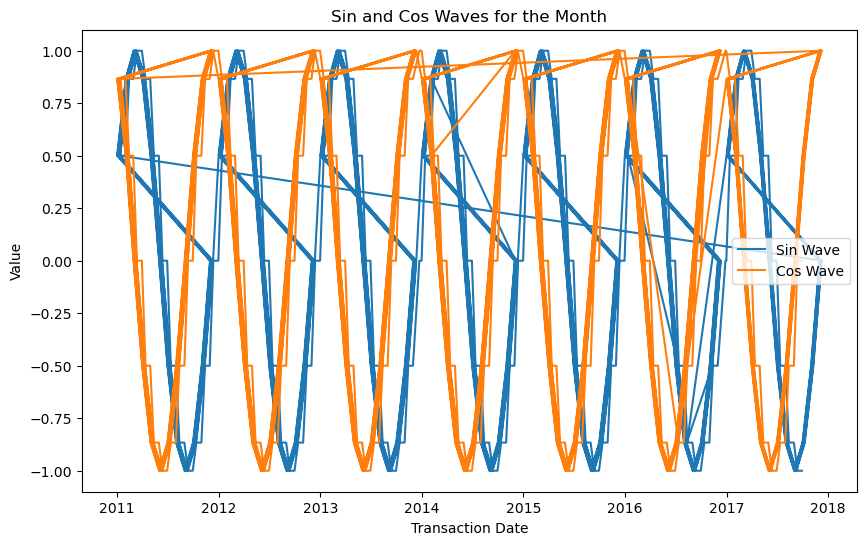

In [8]:
# Plot the sine and cosine waves
plt.figure(figsize=(10, 6))
plt.plot(df['Transaction Date'], df['Sin_Month'], label='Sin Wave')
plt.plot(df['Transaction Date'], df['Cos_Month'], label='Cos Wave')

plt.title('Sin and Cos Waves for the Month')
plt.xlabel('Transaction Date')
plt.ylabel('Value')
plt.legend()
plt.show()

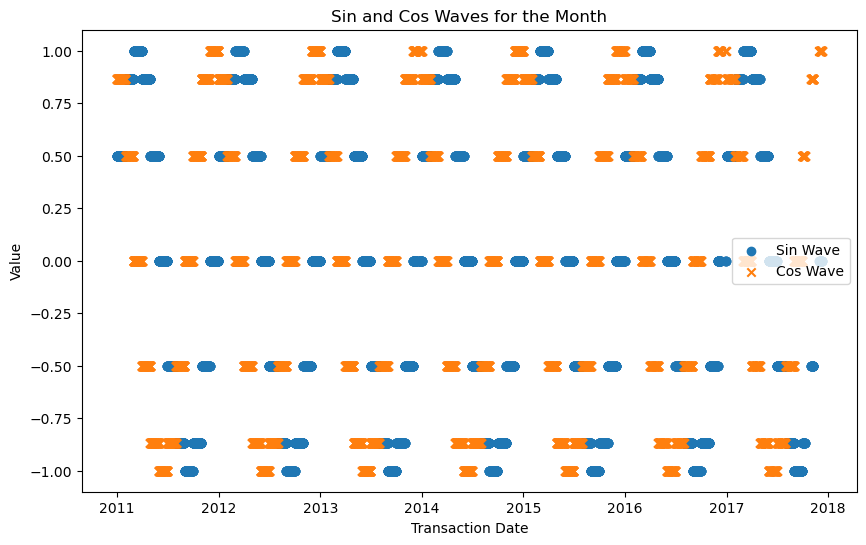

In [9]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Transaction Date'], df['Sin_Month'], label='Sin Wave', marker='o')
plt.scatter(df['Transaction Date'], df['Cos_Month'], label='Cos Wave', marker='x')

plt.title('Sin and Cos Waves for the Month')
plt.xlabel('Transaction Date')
plt.ylabel('Value')
plt.legend()
plt.show()


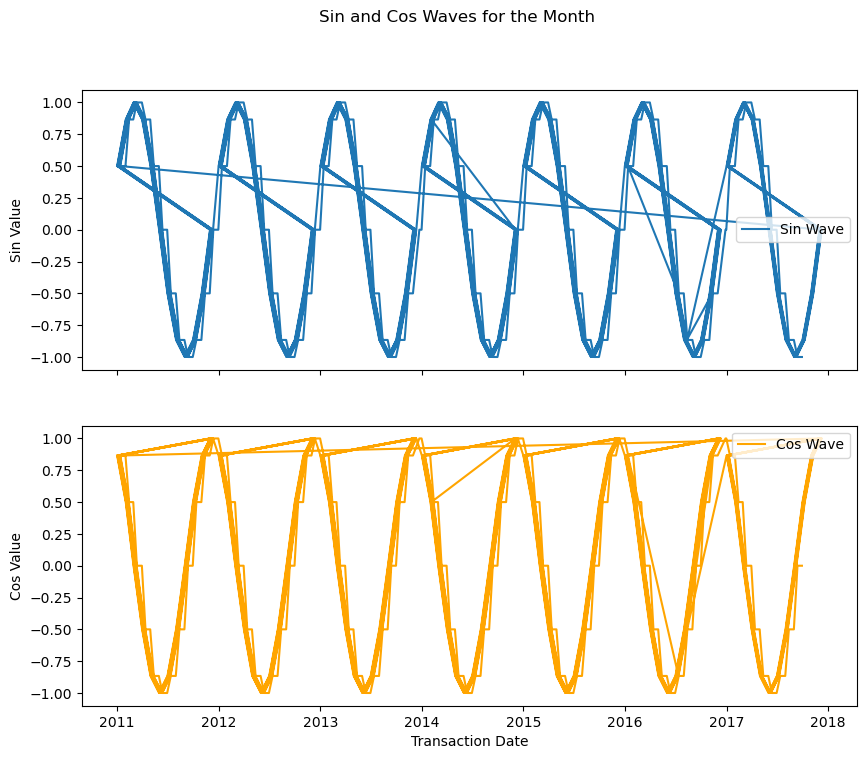

In [10]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8), sharex=True)

axes[0].plot(df['Transaction Date'], df['Sin_Month'], label='Sin Wave')
axes[0].set_ylabel('Sin Value')
axes[0].legend()

axes[1].plot(df['Transaction Date'], df['Cos_Month'], label='Cos Wave', color='orange')
axes[1].set_xlabel('Transaction Date')
axes[1].set_ylabel('Cos Value')
axes[1].legend()

plt.suptitle('Sin and Cos Waves for the Month')
plt.show()


In [11]:
# Assuming 'df' is your DataFrame
df.set_index('Transaction Date', inplace=True)


In [12]:
df.head()

,ATM Name,No Of Withdrawals,No Of XYZ Card Withdrawals,No Of Other Card Withdrawals,Total amount Withdrawn,Amount withdrawn XYZ Card,Amount withdrawn Other Card,Weekday,Festival Religion,Working Day,Holiday Sequence,Year,Month,Day,Sin_Month,Cos_Month
Transaction Date,,,,,,,,,,,,,,,,
2011-01-01,Big Street ATM,50,20,30,123800,41700,82100,5,H,H,HHW,2011,1,1,0.5,0.866025
2011-01-01,Mount Road ATM,253,67,186,767900,270900,497000,5,C,H,HHW,2011,1,1,0.5,0.866025
2011-01-01,Airport ATM,98,56,42,503400,347700,155700,5,C,H,HHW,2011,1,1,0.5,0.866025
2011-01-01,KK Nagar ATM,265,159,106,945300,532600,412700,5,C,H,HHW,2011,1,1,0.5,0.866025
2011-01-01,Christ College ATM,74,25,49,287700,148200,139500,5,C,H,HHW,2011,1,1,0.5,0.866025


In [13]:
df.count()

ATM Name                        11589
No Of Withdrawals               11589
No Of XYZ Card Withdrawals      11589
No Of Other Card Withdrawals    11589
Total amount Withdrawn          11589
Amount withdrawn XYZ Card       11589
Amount withdrawn Other Card     11589
Weekday                         11589
Festival Religion               11589
Working Day                     11589
Holiday Sequence                11589
Year                            11589
Month                           11589
Day                             11589
Sin_Month                       11589
Cos_Month                       11589
dtype: int64

In [14]:
# Assuming 'df' is your DataFrame
df.drop_duplicates(inplace=True)


In [15]:
df.count()

ATM Name                        11589
No Of Withdrawals               11589
No Of XYZ Card Withdrawals      11589
No Of Other Card Withdrawals    11589
Total amount Withdrawn          11589
Amount withdrawn XYZ Card       11589
Amount withdrawn Other Card     11589
Weekday                         11589
Festival Religion               11589
Working Day                     11589
Holiday Sequence                11589
Year                            11589
Month                           11589
Day                             11589
Sin_Month                       11589
Cos_Month                       11589
dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11589 entries, 2011-01-01 to 2017-09-29
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ATM Name                      11589 non-null  object 
 1   No Of Withdrawals             11589 non-null  int64  
 2   No Of XYZ Card Withdrawals    11589 non-null  int64  
 3   No Of Other Card Withdrawals  11589 non-null  int64  
 4   Total amount Withdrawn        11589 non-null  int64  
 5   Amount withdrawn XYZ Card     11589 non-null  int64  
 6   Amount withdrawn Other Card   11589 non-null  int64  
 7   Weekday                       11589 non-null  int32  
 8   Festival Religion             11589 non-null  object 
 9   Working Day                   11589 non-null  object 
 10  Holiday Sequence              11589 non-null  object 
 11  Year                          11589 non-null  int32  
 12  Month                         11589 non-nul

In [17]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder


# Specify columns containing string values that need to be encoded
columns_to_encode = ['ATM Name','Working Day', 'Festival Religion','Holiday Sequence']

# Use LabelEncoder to encode string values to numeric
label_encoder = LabelEncoder()
for column in columns_to_encode:
    df[column] = label_encoder.fit_transform(df[column])



In [18]:
df.head()

,ATM Name,No Of Withdrawals,No Of XYZ Card Withdrawals,No Of Other Card Withdrawals,Total amount Withdrawn,Amount withdrawn XYZ Card,Amount withdrawn Other Card,Weekday,Festival Religion,Working Day,Holiday Sequence,Year,Month,Day,Sin_Month,Cos_Month
Transaction Date,,,,,,,,,,,,,,,,
2011-01-01,1,50,20,30,123800,41700,82100,5,1,0,1,2011,1,1,0.5,0.866025
2011-01-01,4,253,67,186,767900,270900,497000,5,0,0,1,2011,1,1,0.5,0.866025
2011-01-01,0,98,56,42,503400,347700,155700,5,0,0,1,2011,1,1,0.5,0.866025
2011-01-01,3,265,159,106,945300,532600,412700,5,0,0,1,2011,1,1,0.5,0.866025
2011-01-01,2,74,25,49,287700,148200,139500,5,0,0,1,2011,1,1,0.5,0.866025


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11589 entries, 2011-01-01 to 2017-09-29
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ATM Name                      11589 non-null  int32  
 1   No Of Withdrawals             11589 non-null  int64  
 2   No Of XYZ Card Withdrawals    11589 non-null  int64  
 3   No Of Other Card Withdrawals  11589 non-null  int64  
 4   Total amount Withdrawn        11589 non-null  int64  
 5   Amount withdrawn XYZ Card     11589 non-null  int64  
 6   Amount withdrawn Other Card   11589 non-null  int64  
 7   Weekday                       11589 non-null  int32  
 8   Festival Religion             11589 non-null  int32  
 9   Working Day                   11589 non-null  int32  
 10  Holiday Sequence              11589 non-null  int32  
 11  Year                          11589 non-null  int32  
 12  Month                         11589 non-nul

In [20]:
df.columns

Index(['ATM Name', 'No Of Withdrawals', 'No Of XYZ Card Withdrawals',
       'No Of Other Card Withdrawals', 'Total amount Withdrawn',
       'Amount withdrawn XYZ Card', 'Amount withdrawn Other Card', 'Weekday',
       'Festival Religion', 'Working Day', 'Holiday Sequence', 'Year', 'Month',
       'Day', 'Sin_Month', 'Cos_Month'],
      dtype='object')

In [21]:
# Remove and return the column 'Total amount Withdrawn', and then reinsert it at the last position
df['Total amount Withdrawn'] = df.pop('Total amount Withdrawn')


In [22]:
df.describe()

,ATM Name,No Of Withdrawals,No Of XYZ Card Withdrawals,No Of Other Card Withdrawals,Amount withdrawn XYZ Card,Amount withdrawn Other Card,Weekday,Festival Religion,Working Day,Holiday Sequence,Year,Month,Day,Sin_Month,Cos_Month,Total amount Withdrawn
count,11589.000000,11589.000000,11589.000000,11589.000000,1.158900e+04,1.158900e+04,11589.000000,11589.000000,11589.000000,11589.000000,11589.000000,11589.000000,11589.000000,1.158900e+04,1.158900e+04,1.158900e+04
mean,2.001985,123.341099,67.567694,55.773406,3.345604e+05,1.877455e+05,2.989300,3.816119,0.571318,3.862801,2013.760549,6.346967,15.714471,5.952484e-03,-3.537544e-02,5.223059e+05
std,1.401493,67.315288,47.849517,38.506475,2.470771e+05,1.502351e+05,1.996473,0.702893,0.494909,2.657368,1.920326,3.375119,8.877120,7.138987e-01,6.993912e-01,3.248167e+05
min,0.000000,1.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,2011.000000,1.000000,1.000000,-1.000000e+00,-1.000000e+00,1.000000e+02
25%,1.000000,79.000000,34.000000,25.000000,1.560000e+05,7.910000e+04,1.000000,4.000000,0.000000,1.000000,2012.000000,3.000000,8.000000,-8.660254e-01,-8.660254e-01,3.057000e+05
50%,2.000000,115.000000,57.000000,50.000000,2.816000e+05,1.586000e+05,3.000000,4.000000,1.000000,3.000000,2014.000000,6.000000,16.000000,1.224647e-16,-1.836970e-16,4.700000e+05
75%,3.000000,158.000000,87.000000,78.000000,4.485000e+05,2.560000e+05,5.000000,4.000000,1.000000,7.000000,2015.000000,9.000000,23.000000,8.660254e-01,5.000000e-01,6.716000e+05
max,4.000000,491.000000,345.000000,310.000000,1.907800e+06,1.472600e+06,6.000000,4.000000,1.000000,7.000000,2017.000000,12.000000,31.000000,1.000000e+00,1.000000e+00,2.549800e+06


In [23]:

X = df.drop('Total amount Withdrawn' , axis = 1) # Features are all columns except the last one
y = df["Total amount Withdrawn"]   # Target variable is the last column


In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.1)


In [25]:
X_train

,ATM Name,No Of Withdrawals,No Of XYZ Card Withdrawals,No Of Other Card Withdrawals,Amount withdrawn XYZ Card,Amount withdrawn Other Card,Weekday,Festival Religion,Working Day,Holiday Sequence,Year,Month,Day,Sin_Month,Cos_Month
Transaction Date,,,,,,,,,,,,,,,
2014-08-28,4,183,103,80,319800,328200,3,4,1,6,2014,8,28,-8.660254e-01,-5.000000e-01
2017-03-05,0,70,50,20,277500,46900,6,4,1,7,2017,3,5,1.000000e+00,6.123234e-17
2014-03-07,3,266,194,72,1178000,330400,4,4,1,7,2014,3,7,1.000000e+00,6.123234e-17
2015-11-09,2,132,74,58,466200,229500,0,4,1,6,2015,11,9,-5.000000e-01,8.660254e-01
2011-02-01,4,194,50,144,171700,357600,1,4,0,1,2011,2,1,8.660254e-01,5.000000e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-12-31,0,119,96,23,623000,98900,1,4,1,6,2013,12,31,-2.449294e-16,1.000000e+00
2017-02-17,2,157,45,112,295700,452500,4,4,1,6,2017,2,17,8.660254e-01,5.000000e-01
2012-02-04,0,114,96,18,519400,22200,5,4,0,1,2012,2,4,8.660254e-01,5.000000e-01


In [26]:
y_train

Transaction Date
2014-08-28     648000
2017-03-05     324400
2014-03-07    1508400
2015-11-09     695700
2011-02-01     529300
               ...   
2013-12-31     721900
2017-02-17     748200
2012-02-04     541600
2011-07-31     163300
2011-12-04     111500
Name: Total amount Withdrawn, Length: 9271, dtype: int64

In [27]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_train_scale= std.fit_transform(X_train)
# X_val_scale= std.fit_transform(X_val)
X_test_scale= std.fit_transform(X_test)


In [28]:
# Assuming y_train, y_val, and y_test are pandas Series objects
# Convert them to numpy arrays
y_train_np = y_train.to_numpy().reshape(-1, 1)
# y_val_np = y_val.to_numpy().reshape(-1, 1)
y_test_np = y_test.to_numpy().reshape(-1, 1)


y_train_scale= std.fit_transform(y_train_np)
# y_val_scale= std.fit_transform(y_val_np)
y_test_scale= std.fit_transform(y_test_np)


In [29]:
y_train_scale

array([[ 0.38610829],
       [-0.60668266],
       [ 3.02577866],
       ...,
       [ 0.05967764],
       [-1.10093057],
       [-1.25985075]])

# TRAIN DATA SET

In [30]:
# Importing necessary libraries
# from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

# # Load the Boston housing dataset
# boston = load_boston()
# X, y = boston.data, boston.target

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the GradientBoostingRegressor
gb_regressor = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
gb_regressor.fit(X_train_scale, y_train_scale)

# Make predictions
y_pred = gb_regressor.predict(X_train_scale)

# Calculate the Mean Squared Error
mse = mean_squared_error(y_train_scale, y_pred)
mae=mean_absolute_error(y_train_scale, y_pred)
r2=r2_score(y_train_scale, y_pred)
print("Mean Squared Error:", mse)
print("mean_absolute_error", mae)
print("r2_score",r2)


C:\Users\Welcome\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Squared Error: 0.00024561606706440756
mean_absolute_error 0.011976614578462557
r2_score 0.9997543839329356


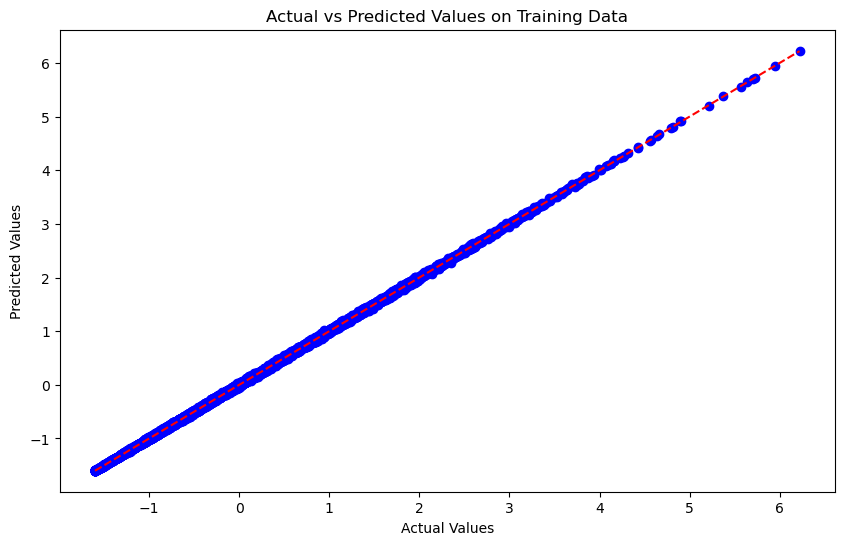

In [31]:
# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_train_scale, y_pred, color='blue')
plt.plot([min(y_train_scale), max(y_train_scale)], [min(y_train_scale), max(y_train_scale)], linestyle='--', color='red')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values on Training Data")
plt.show()


In [32]:
# gb_regressor.fit(X_train, y_train)

# # Make predictions
# y_pred = gb_regressor.predict(X_train)

# # Calculate the Mean Squared Error
# mse = mean_squared_error(y_train, y_pred)
# mae=mean_absolute_error(y_train, y_pred)
# r2=r2_score(y_train, y_pred)
# print("Mean Squared Error:", mse)
# print("mean_absolute_error", mae)
# print("r2_score",r2)


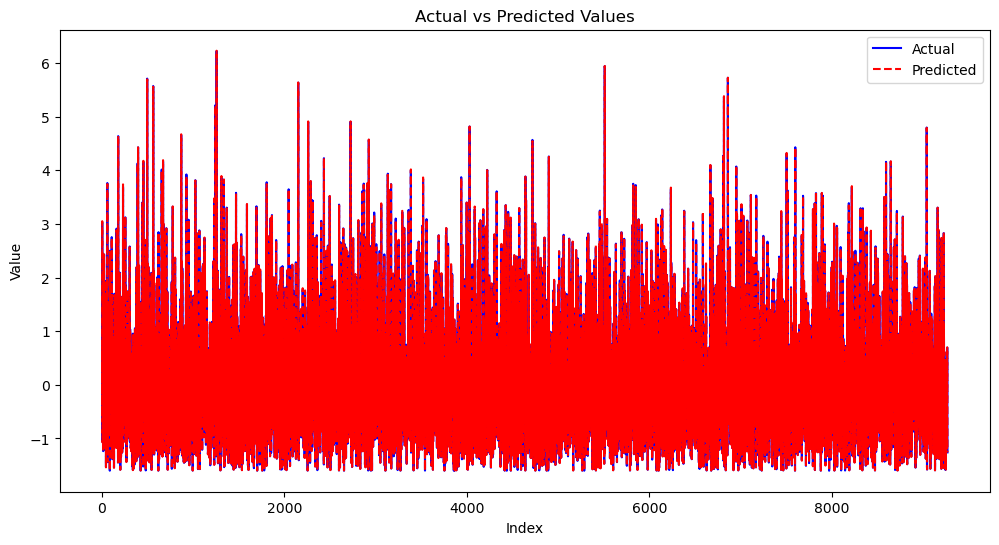

In [33]:
import matplotlib.pyplot as plt

# Plot actual vs predicted values with time series format
plt.figure(figsize=(12, 6))
plt.plot(range(len(y_train_scale)), y_train_scale, label='Actual', color='blue')
plt.plot(range(len(y_pred)), y_pred, label='Predicted', color='red', linestyle='--')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()


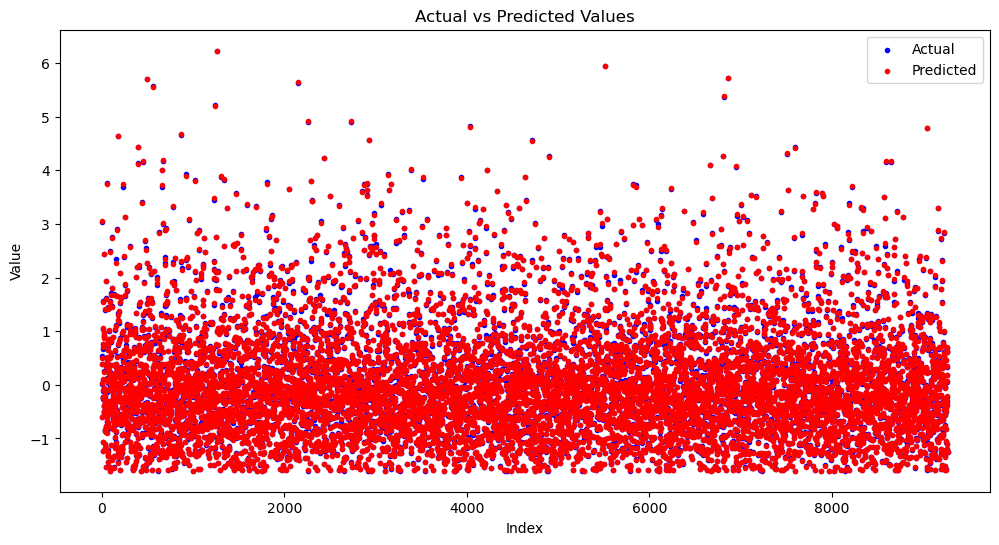

In [34]:
# Plot actual vs predicted values using a scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(range(len(y_train_scale)), y_train_scale, label='Actual', color='blue', marker='.')
plt.scatter(range(len(y_pred)), y_pred, label='Predicted', color='red', marker='.')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()

In [35]:
y_pred_reshape=y_pred.reshape(-1,1)
y_train_rescaled = std.inverse_transform(y_pred_reshape)
print(y_train_rescaled)

[[ 646357.64739207]
 [ 331941.73783184]
 [1499474.10593697]
 ...
 [ 544441.19058868]
 [ 172152.83083562]
 [ 119380.88634687]]


In [36]:
# Concatenate the two DataFrames side by side
original_train_df = pd.concat([X_train, y_train], axis=1)

# Display the concatenated DataFrame
original_train_df.head()

,ATM Name,No Of Withdrawals,No Of XYZ Card Withdrawals,No Of Other Card Withdrawals,Amount withdrawn XYZ Card,Amount withdrawn Other Card,Weekday,Festival Religion,Working Day,Holiday Sequence,Year,Month,Day,Sin_Month,Cos_Month,Total amount Withdrawn
Transaction Date,,,,,,,,,,,,,,,,
2014-08-28,4,183,103,80,319800,328200,3,4,1,6,2014,8,28,-0.866025,-5.000000e-01,648000
2017-03-05,0,70,50,20,277500,46900,6,4,1,7,2017,3,5,1.000000,6.123234e-17,324400
2014-03-07,3,266,194,72,1178000,330400,4,4,1,7,2014,3,7,1.000000,6.123234e-17,1508400
2015-11-09,2,132,74,58,466200,229500,0,4,1,6,2015,11,9,-0.500000,8.660254e-01,695700
2011-02-01,4,194,50,144,171700,357600,1,4,0,1,2011,2,1,0.866025,5.000000e-01,529300


In [37]:
# Create a new column in the DataFrame for the predicted values
original_train_df['Predicted_Value'] = y_train_rescaled

# Display the DataFrame with the predicted values added
original_train_df.head()

,ATM Name,No Of Withdrawals,No Of XYZ Card Withdrawals,No Of Other Card Withdrawals,Amount withdrawn XYZ Card,Amount withdrawn Other Card,Weekday,Festival Religion,Working Day,Holiday Sequence,Year,Month,Day,Sin_Month,Cos_Month,Total amount Withdrawn,Predicted_Value
Transaction Date,,,,,,,,,,,,,,,,,
2014-08-28,4,183,103,80,319800,328200,3,4,1,6,2014,8,28,-0.866025,-5.000000e-01,648000,6.463576e+05
2017-03-05,0,70,50,20,277500,46900,6,4,1,7,2017,3,5,1.000000,6.123234e-17,324400,3.319417e+05
2014-03-07,3,266,194,72,1178000,330400,4,4,1,7,2014,3,7,1.000000,6.123234e-17,1508400,1.499474e+06
2015-11-09,2,132,74,58,466200,229500,0,4,1,6,2015,11,9,-0.500000,8.660254e-01,695700,6.845798e+05
2011-02-01,4,194,50,144,171700,357600,1,4,0,1,2011,2,1,0.866025,5.000000e-01,529300,5.340850e+05


In [38]:
# Calculate individual error
original_train_df['Individual Error'] =original_train_df['Predicted_Value'] - original_train_df['Total amount Withdrawn']

# Display the DataFrame with the individual error column added
original_train_df.head()

,ATM Name,No Of Withdrawals,No Of XYZ Card Withdrawals,No Of Other Card Withdrawals,Amount withdrawn XYZ Card,Amount withdrawn Other Card,Weekday,Festival Religion,Working Day,Holiday Sequence,Year,Month,Day,Sin_Month,Cos_Month,Total amount Withdrawn,Predicted_Value,Individual Error
Transaction Date,,,,,,,,,,,,,,,,,,
2014-08-28,4,183,103,80,319800,328200,3,4,1,6,2014,8,28,-0.866025,-5.000000e-01,648000,6.463576e+05,-1642.352608
2017-03-05,0,70,50,20,277500,46900,6,4,1,7,2017,3,5,1.000000,6.123234e-17,324400,3.319417e+05,7541.737832
2014-03-07,3,266,194,72,1178000,330400,4,4,1,7,2014,3,7,1.000000,6.123234e-17,1508400,1.499474e+06,-8925.894063
2015-11-09,2,132,74,58,466200,229500,0,4,1,6,2015,11,9,-0.500000,8.660254e-01,695700,6.845798e+05,-11120.245160
2011-02-01,4,194,50,144,171700,357600,1,4,0,1,2011,2,1,0.866025,5.000000e-01,529300,5.340850e+05,4785.045678


In [39]:
original_train_df.to_csv("Train_GB.csv", index=False)

# TEST DATA SET

In [40]:
gb_regressor.fit(X_test_scale, y_test_scale)

# Make predictions
y_pred = gb_regressor.predict(X_test_scale)

# Calculate the Mean Squared Error
mse = mean_squared_error(y_test_scale, y_pred)
mae=mean_absolute_error(y_test_scale, y_pred)
r2=r2_score(y_test_scale, y_pred)
print("Mean Squared Error:", mse)
print("mean_absolute_error", mae)
print("r2_score",r2)


C:\Users\Welcome\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Squared Error: 0.00012424589924093203
mean_absolute_error 0.008640888775487203
r2_score 0.999875754100759


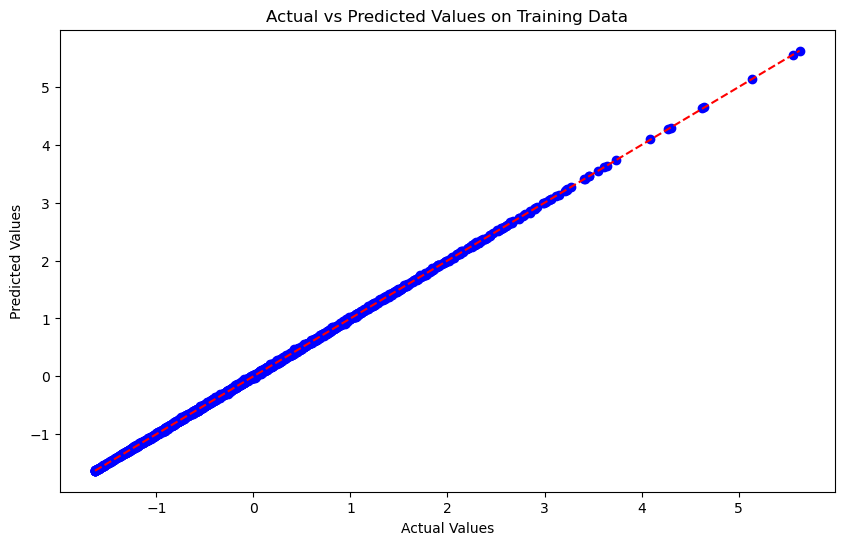

In [41]:
# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test_scale, y_pred, color='blue')
plt.plot([min(y_test_scale), max(y_test_scale)], [min(y_test_scale), max(y_test_scale)], linestyle='--', color='red')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values on Training Data")
plt.show()


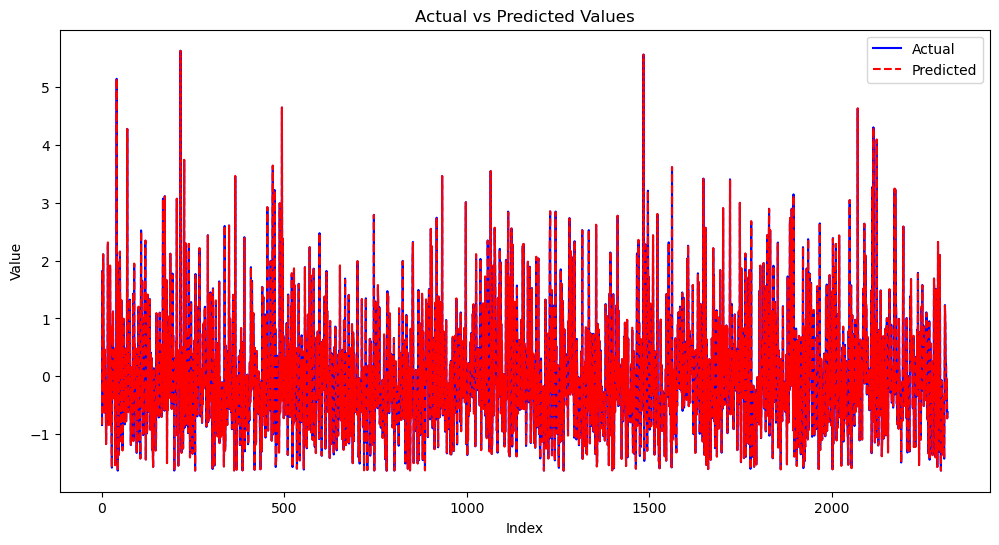

In [42]:
import matplotlib.pyplot as plt

# Plot actual vs predicted values with time series format
plt.figure(figsize=(12, 6))
plt.plot(range(len(y_test_scale)), y_test_scale, label='Actual', color='blue')
plt.plot(range(len(y_pred)), y_pred, label='Predicted', color='red', linestyle='--')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()


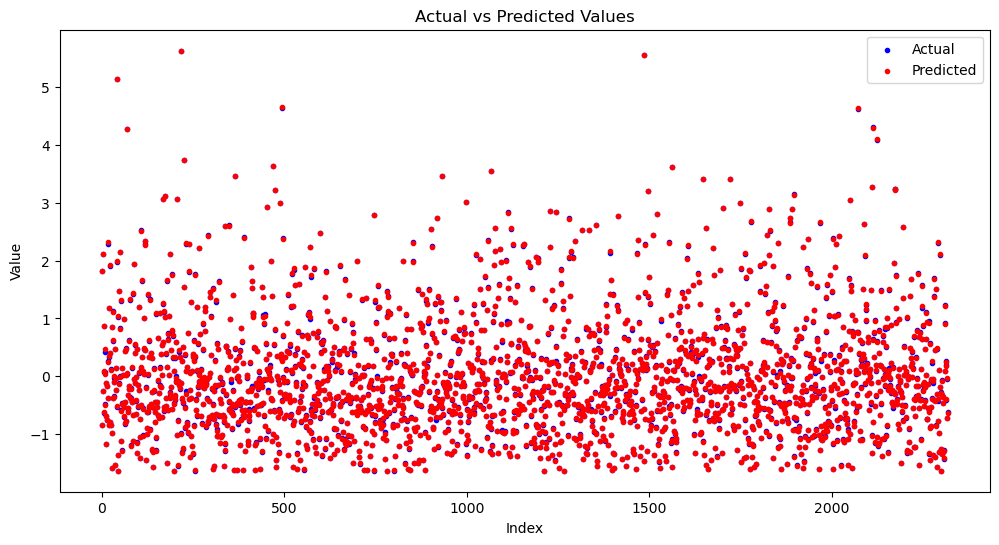

In [43]:
# Plot actual vs predicted values using a scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(range(len(y_test_scale)), y_test_scale, label='Actual', color='blue', marker='.')
plt.scatter(range(len(y_pred)), y_pred, label='Predicted', color='red', marker='.')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()

In [44]:
y_pred_reshape=y_pred.reshape(-1,1)
y_test_rescaled = std.inverse_transform(y_pred_reshape)
print(y_test_rescaled)

[[ 254312.57411661]
 [1106639.11168437]
 [ 440926.99014406]
 ...
 [ 510901.97149968]
 [ 290914.97494391]
 [ 319640.47586144]]


In [45]:
# Concatenate the two DataFrames side by side
original_test_df = pd.concat([X_test, y_test], axis=1)

# Display the concatenated DataFrame
original_test_df.head()

,ATM Name,No Of Withdrawals,No Of XYZ Card Withdrawals,No Of Other Card Withdrawals,Amount withdrawn XYZ Card,Amount withdrawn Other Card,Weekday,Festival Religion,Working Day,Holiday Sequence,Year,Month,Day,Sin_Month,Cos_Month,Total amount Withdrawn
Transaction Date,,,,,,,,,,,,,,,,
2013-05-03,1,88,31,57,125400,127700,4,4,1,7,2013,5,3,5.000000e-01,-8.660254e-01,253100
2013-02-13,3,239,181,58,854800,252400,2,4,1,7,2013,2,13,8.660254e-01,5.000000e-01,1107200
2014-06-15,1,122,39,83,197300,244400,6,4,0,1,2014,6,15,1.224647e-16,-1.000000e+00,441700
2012-10-08,3,242,187,55,974800,223500,0,4,0,1,2012,10,8,-8.660254e-01,5.000000e-01,1198300
2013-03-07,0,137,103,34,681000,119000,3,4,1,7,2013,3,7,1.000000e+00,6.123234e-17,800000


In [46]:
# Create a new column in the DataFrame for the predicted values
original_test_df['Predicted_Value'] = y_test_rescaled

# Display the DataFrame with the predicted values added
original_test_df.head()

,ATM Name,No Of Withdrawals,No Of XYZ Card Withdrawals,No Of Other Card Withdrawals,Amount withdrawn XYZ Card,Amount withdrawn Other Card,Weekday,Festival Religion,Working Day,Holiday Sequence,Year,Month,Day,Sin_Month,Cos_Month,Total amount Withdrawn,Predicted_Value
Transaction Date,,,,,,,,,,,,,,,,,
2013-05-03,1,88,31,57,125400,127700,4,4,1,7,2013,5,3,5.000000e-01,-8.660254e-01,253100,2.543126e+05
2013-02-13,3,239,181,58,854800,252400,2,4,1,7,2013,2,13,8.660254e-01,5.000000e-01,1107200,1.106639e+06
2014-06-15,1,122,39,83,197300,244400,6,4,0,1,2014,6,15,1.224647e-16,-1.000000e+00,441700,4.409270e+05
2012-10-08,3,242,187,55,974800,223500,0,4,0,1,2012,10,8,-8.660254e-01,5.000000e-01,1198300,1.197457e+06
2013-03-07,0,137,103,34,681000,119000,3,4,1,7,2013,3,7,1.000000e+00,6.123234e-17,800000,8.024387e+05


In [47]:
# Calculate individual error
original_test_df['Individual Error'] =original_test_df['Predicted_Value'] - original_test_df['Total amount Withdrawn']

# Display the DataFrame with the individual error column added
original_test_df.head()

,ATM Name,No Of Withdrawals,No Of XYZ Card Withdrawals,No Of Other Card Withdrawals,Amount withdrawn XYZ Card,Amount withdrawn Other Card,Weekday,Festival Religion,Working Day,Holiday Sequence,Year,Month,Day,Sin_Month,Cos_Month,Total amount Withdrawn,Predicted_Value,Individual Error
Transaction Date,,,,,,,,,,,,,,,,,,
2013-05-03,1,88,31,57,125400,127700,4,4,1,7,2013,5,3,5.000000e-01,-8.660254e-01,253100,2.543126e+05,1212.574117
2013-02-13,3,239,181,58,854800,252400,2,4,1,7,2013,2,13,8.660254e-01,5.000000e-01,1107200,1.106639e+06,-560.888316
2014-06-15,1,122,39,83,197300,244400,6,4,0,1,2014,6,15,1.224647e-16,-1.000000e+00,441700,4.409270e+05,-773.009856
2012-10-08,3,242,187,55,974800,223500,0,4,0,1,2012,10,8,-8.660254e-01,5.000000e-01,1198300,1.197457e+06,-843.420402
2013-03-07,0,137,103,34,681000,119000,3,4,1,7,2013,3,7,1.000000e+00,6.123234e-17,800000,8.024387e+05,2438.734982


In [48]:
original_test_df.to_csv("Test_GB.csv", index=False)
